In [41]:
#coding: utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')

def execute(category):
    df=pd.read_csv('/Users/liyuefan/Documents/gtja/%sFI_0112.csv'%category,encoding='gbk')



    df['update_date']=pd.to_datetime(df['update_date'])
    df['close_yes']=df['close'].shift(2)
    df['high_yes']=df['high'].shift(2)
    df['low_yes']=df['low'].shift(2)

    df['max10']=pd.rolling_max(df['close_yes'],10)
    df['max20']=pd.rolling_max(df['close_yes'],20)
    df['max30']=pd.rolling_max(df['close_yes'],80)
    df['max60']=pd.rolling_max(df['close_yes'],100)
    df['max100']=pd.rolling_max(df['close_yes'],200)
    df['min10']=pd.rolling_min(df['close_yes'],10)
    df['min20']=pd.rolling_min(df['close_yes'],20)
    df['min30']=pd.rolling_min(df['close_yes'],80)
    df['min60']=pd.rolling_min(df['close_yes'],100)
    df['min100']=pd.rolling_min(df['close_yes'],200)

    df['close_return_yes']=np.log(df['close_yes'])
    df['close_return_yes']=df['close_return_yes'].diff()
#     df['volatility_20']=pd.rolling_mean((df['high_yes']-df['low_yes'])/df['low_yes'],20)
#     df['volatility_60']=pd.rolling_mean((df['high_yes']-df['low_yes'])/df['low_yes'],60)
#     df['volatility_100']=pd.rolling_mean((df['high_yes']-df['low_yes'])/df['low_yes'],100)
#     df['volatility_200']=pd.rolling_mean((df['high_yes']-df['low_yes'])/df['low_yes'],200)
    df['volatility_20']=pd.rolling_std(df['close_return_yes'],20)
    df['volatility_60']=pd.rolling_std(df['close_return_yes'],80)
    df['volatility_100']=pd.rolling_std(df['close_return_yes'],100)
    df['volatility_200']=pd.rolling_std(df['close_return_yes'],200)


    def sig(x1,x2,p):
        if p<x1:
            return -1
        elif p>x2:
            return 1
        else:
            return 0

    df['stop_ma10']=map(sig,df['min10'],df['max10'],df['close'])
    df['p_ma10']=map(sig,df['min20'],df['max20'],df['close'])
    df['p_ma30']=map(sig,df['min30'],df['max30'],df['close'])
    df['p_ma60']=map(sig,df['min60'],df['max60'],df['close'])
    df['p_ma100']=map(sig,df['min100'],df['max100'],df['close'])


    def dir(x):
        if x>0:
            return 1
        elif x<0:
            return -1
        else:
            return 0
    df=df.sort('update_date')


    df['p_ma10']=df['p_ma10'].fillna(method='ffill')
    df['p_ma30']=df['p_ma30'].fillna(method='ffill')
    df['p_ma60']=df['p_ma60'].fillna(method='ffill')
    df['p_ma100']=df['p_ma100'].fillna(method='ffill')

    df=df.dropna(axis=0)

    pos_mat=df.loc[:,['p_ma10','p_ma30','p_ma60','p_ma100','volatility_20','volatility_60','volatility_100','volatility_200','stop_ma10']]
    pos_mat=pos_mat.as_matrix()

    N=pos_mat.shape[0]
#     p=np.zeros(N)
    p=[np.nan for i in range(N)]
    temp_tag=0
    discount_tag=0
    for i in range(0,N,1):
        if np.isnan(pos_mat[i,3])==True:
            p[i]=0
        else:
            if pos_mat[i,0]>0 and pos_mat[i,8]>=0:
                temp_tag=1
                dis_20=pos_mat[i,4]/np.mean(pos_mat[:i,4])
                dis_60=pos_mat[i,5]/np.mean(pos_mat[:i,5])
                dis_100=pos_mat[i,6]/np.mean(pos_mat[:i,6])
                dis_200=pos_mat[i,7]/np.mean(pos_mat[:i,7])
#                 p[i]=0.4/dis_20
                p[i]=0.4*np.exp(-discount_tag)
                discount_tag+=1
                if pos_mat[i,3]>0:
#                     p[i]=0.4/dis_20+0.3/dis_60+0.2/dis_100+0.1/dis_200
                    p[i]=1
                    discount_tag=0
                elif pos_mat[i,2]>0:
#                     p[i]=0.4/dis_20+0.3/dis_60+0.2/dis_100
                    p[i]=0.9
                    discount_tag=0
                elif pos_mat[i,1]>0:
#                     p[i]=0.4/dis_20+0.3/dis_60
                    p[i]=0.7
                    discount_tag=0

            elif pos_mat[i,0]<0 and pos_mat[i,8]<=0:
                temp_tag=-1
                dis_20=pos_mat[i,4]/np.mean(pos_mat[:i,4])
                dis_60=pos_mat[i,5]/np.mean(pos_mat[:i,5])
                dis_100=pos_mat[i,6]/np.mean(pos_mat[:i,6])
                dis_200=pos_mat[i,7]/np.mean(pos_mat[:i,7])
#                 p[i]=-0.4/dis_20
                p[i]=-0.4*np.exp(-discount_tag)
                discount_tag+=1
                if pos_mat[i,3]<0:
#                     p[i]=-0.4/dis_20-0.3/dis_60-0.2/dis_100-0.1/dis_200
                    p[i]=-1
                    discount_tag=0
                elif pos_mat[i,2]<0:
#                     p[i]=-0.4/dis_20-0.3/dis_60-0.2/dis_100
                    p[i]=-0.9
                    discount_tag=0
                elif pos_mat[i,1]<0:
#                     p[i]=-0.4/dis_20-0.3/dis_60
                    p[i]=-0.7
                    discount_tag=0

#             elif temp_tag>0 and pos_mat[i,8]==-1:
#                 temp_tag=0
#                 print 'stop'
#                 p[i]=0
#             elif temp_tag<0 and pos_mat[i,8]==1:
#                 temp_tag=0
#                 print 'stop'
#                 p[i]=0
#             else:
#                 p[i]=np.nan



    df['position']=p
    df['position']=df['position'].fillna(method='ffill')

    df['close_return']=np.log(df['close'])
    df['close_return']=df['close_return'].diff()

    df['position']=df['position'].shift(2)


    df['daily_return']=df['position']*df['close_return']
    
    
    
    close_return=np.array(df['daily_return'])
    position=np.array(df['position'])
    for i in range(1,len(position)):
        if position[i]!=position[i-1]:
            close_return[i-1]=close_return[i-1]-1./10000
            close_return[i]=close_return[i]-1./10000
        else:
            pass
    df['daily_return']=close_return
    
    

    df['cum_return']=df['daily_return'].cumsum()

    df.index=[df['update_date']]
    return df

In [42]:
def portfolio(comp1,comp2,corr):
    if type(comp1)==str and type(comp2)==str:
        comp1=execute(comp1)
        comp2=execute(comp2)
    else:
        comp1=comp1
        comp2=comp2
    comp1=comp1.rename(columns={'daily_return':'daily_return_1','close_return':'close_return_1'})
    comp2=comp2.rename(columns={'daily_return':'daily_return_2','close_return':'close_return_2'})
    t=pd.merge(comp1,comp2,on='update_date',how='inner')

    tt=t.loc[:,['update_date','daily_return_1','daily_return_2','close_return_1','close_return_2']]
    

    tt['portfolio_return']=0.5*tt['daily_return_1']+0.5*tt['daily_return_2']
    tt['close_return']=0.5*tt['close_return_1']+0.5*tt['close_return_2']

    tt['port_cum_return']=tt['portfolio_return'].cumsum()
    tt['port_cummax']=tt['port_cum_return'].cummax()
    tt['port_drawdown']=tt['port_cum_return']-tt['port_cummax']
    tt['update_date']=pd.to_datetime(tt['update_date'])
    return tt

In [43]:
def port_port(port1,port2):
    port1=port1.drop(['daily_return_1','daily_return_2','close_return_1','close_return_2'],axis=1)
    port2=port2.drop(['daily_return_1','daily_return_2','close_return_1','close_return_2'],axis=1)
    port1=port1.rename(columns={'portfolio_return':'daily_return_1','close_return':'close_return_1'})
    port2=port2.rename(columns={'portfolio_return':'daily_return_2','close_return':'close_return_2'})
    
    t=pd.merge(port1,port2,on='update_date',how='inner')

    tt=t.loc[:,['update_date','daily_return_1','daily_return_2','close_return_1','close_return_2']]

    
    tt['portfolio_return']=0.5*tt['daily_return_1']+0.5*tt['daily_return_2']
    tt['close_return']=0.5*tt['close_return_1']+tt['close_return_2']

    tt['port_cum_return']=tt['portfolio_return'].cumsum()
    tt['port_cummax']=tt['port_cum_return'].cummax()
    tt['port_drawdown']=tt['port_cum_return']-tt['port_cummax']
    return tt

In [44]:
def plot_figure(tt):
    drawdown_interval_right=np.argmin(tt['port_drawdown'])
    drawdown_interval_left=np.argwhere(tt['port_cummax']==tt['port_cummax'][drawdown_interval_right])[0,0]
    plt.figure(figsize=(15,10))
    plt.plot(tt['update_date'],tt['port_cum_return'],label='cum:return:%.2f'%np.array(tt['port_cum_return'])[-1])
    plt.vlines(tt['update_date'][drawdown_interval_left:drawdown_interval_right].values,np.min(tt['port_cum_return']),np.max(tt['port_cum_return']),colors='r',linestyles='dashed',alpha=0.2,label='max_drawdown_interval:%.2f'%np.min(tt['port_drawdown']))
    plt.legend()
    print 'return/drawdown = ', np.array(tt['port_cum_return'])[-1]/np.abs(np.min(tt['port_drawdown']))

In [45]:
# df.to_csv('df.csv',encoding='gbk')

In [46]:
# df.to_csv('df.csv',encoding='gbk')

In [47]:
from sklearn.decomposition import PCA as PCA
def comp_portfolio_pca(asset_pool):
    import itertools
    import scipy as sp
    all_assets=pd.DataFrame(columns=['update_date'])
    for a in asset_pool:
        tmp=execute(a)
        tmp=tmp.loc[:,['update_date','close_return']]
        tmp=tmp.rename(columns={'close_return':'%s'%a})
        all_assets=pd.merge(all_assets,tmp,on='update_date',how='outer')
    all_assets['update_date']=pd.to_datetime(all_assets['update_date'])
    all_assets['year']=all_assets['update_date'].apply(lambda x: x.year)
    
    selected_port_dict={}
    for year in pd.unique(all_assets['year']):
        tmp=all_assets[all_assets['year']==year]
        tmp=tmp.dropna(how='all',axis=1)
        col_list=[col for col in tmp.columns if col!='update_date' and col!='year']
        corr_dict={}
        mat=tmp[col_list]
        mat=mat.fillna(0)
        mat=mat.as_matrix()
        pca=PCA(whiten=True)
        pca.fit(mat)
        com=pca.components_[0]
        com=np.abs(com)
        com=list(com)
        com1=np.argmax(com)
        del com[com1]
        com2=np.argmax(com)
        del com[com2]
        com3=np.argmax(com)
        del com[com3]
        com4=np.argmax(com)

        selected_port_dict[year+1]=[(col_list[com1],col_list[com2]),(col_list[com3],col_list[com4])]
        
        print year+1, com1,com2,com3,com4
    return selected_port_dict
    
                

In [48]:
def comp_portfolio(asset_pool):
    import itertools
    import scipy as sp
    import scipy.stats as stats
    all_assets=pd.DataFrame(columns=['update_date'])
    for a in asset_pool:
        tmp=execute(a)
#         tmp=tmp.loc[:,['update_date','daily_return']]
        tmp=tmp.loc[:,['update_date','close_return']] 
#         tmp=tmp.rename(columns={'daily_return':'%s'%a})
        tmp=tmp.rename(columns={'close_return':'%s'%a})
        all_assets=pd.merge(all_assets,tmp,on='update_date',how='outer')
    all_assets['update_date']=pd.to_datetime(all_assets['update_date'])
    all_assets['year']=all_assets['update_date'].apply(lambda x: x.year)
    selected_port_dict={}
    for year in pd.unique(all_assets['year']):
        tmp=all_assets[all_assets['year']==year]
        tmp=tmp.dropna(how='all',axis=1)
        col_list=[col for col in tmp.columns if col!='update_date' and col!='year']
        corr_dict={}
        for item in itertools.product(col_list,col_list):
            if item[0]!=item[1]:
                cor_mat=tmp.loc[:,item]
                cor_mat=cor_mat.dropna(axis=0)
                cor_mat=cor_mat.as_matrix()
#                 corr=sp.corrcoef(cor_mat.T)
                corr,p=stats.pearsonr(cor_mat[:,0],cor_mat[:,1])
#                 corr=corr[0,1]
                if p>1:
                    corr_dict[item]=np.abs(corr)
                else:
                    corr_dict[item]=np.nan
            else:
                pass
        corr_dict_items=filter(lambda x:np.isnan(x[1])==False,corr_dict.items())
        if len(corr_dict_items)>=4:
            selected_port=[item for item in sorted(corr_dict_items, key=lambda d:d[1],reverse=False)][0:3]
            selected_port_1=selected_port[0]
            selected_list=[x for x in selected_port_1[0]]
            for i in range(len(selected_port)):
                tmp_1=selected_port[i][0]
                if tmp_1[0] not in selected_list or tmp_1[1] not in selected_list:
                    selected_port_2=selected_port[i]
                else:
                    pass
            selected_port_dict[year+1]=[selected_port_1,selected_port_2]
        
            print year+1, selected_port_1, '%.3f'%selected_port_dict[year+1][0][1]
            print year+1, selected_port_2, '%.3f'%selected_port_dict[year+1][1][1]
        #如果无法通过相关性检验，则选择波动性最低的几个品种
        else:
            tmp_=tmp.drop(['update_date','year'],axis=1)
            
            std_list=np.std(tmp_)
            std_list=std_list.to_dict()
            std_list=filter(lambda x:np.isnan(x[1])==False,std_list.items())
            if len(std_list)>=100:
                selected_port=[item for item in sorted(std_list,key=lambda d:d[1],reverse=False)][0:4]
                selected_port_1=((selected_port[0][0],selected_port[1][0]),0)
                selected_port_2=((selected_port[2][0],selected_port[3][0]),0)
                selected_port_dict[year+1]=[selected_port_1,selected_port_2]
                print 'std min: ',year+1, selected_port_1#, '%.3f'%selected_port_dict[year+1][0][1]
                print 'std min: ',year+1, selected_port_2#, '%.3f'%selected_port_dict[year+1][1][1]
            #如果还不行，那就直接按照过去一年的累积收益率高低进行排序，选择去年收益率最低的做一个反转策略
            else:
            
            
            
                mean_list=np.abs(np.mean(tmp_))
                mean_list=mean_list.to_dict()
                mean_list=filter(lambda x:np.isnan(x[1])==False,mean_list.items())


                if len(mean_list)>=4:
                    selected_port=[item for item in sorted(mean_list,key=lambda d:d[1],reverse=False)][0:4]
                    selected_port_1=((selected_port[0][0],selected_port[1][0]),0)
                    selected_port_2=((selected_port[2][0],selected_port[3][0]),0)
                    selected_port_dict[year+1]=[selected_port_1,selected_port_2]
                    print 'mean reverse: ',year+1, selected_port_1#, '%.3f'%selected_port_dict[year+1][0][1]
                    print 'mean reverse: ',year+1, selected_port_2#, '%.3f'%selected_port_dict[year+1][1][1]
                #如果这样都不行的话...
                else:
                    pass
                    print u'另请高明：',year+1
                    

                
            
    return selected_port_dict
    
                

In [49]:
asset_pool=['CU','ZN','PB','AL','NI','I','JM','J','WH','ZC','Y','TA','SR','RU','RM','P','M','C']

In [50]:
a=comp_portfolio(asset_pool)

mean reverse:  2009 (('Y', 'C'), 0)
mean reverse:  2009 (('P', 'M'), 0)
mean reverse:  2010 (('C', 'M'), 0)
mean reverse:  2010 (('Y', 'P'), 0)
mean reverse:  2011 (('AL', 'ZN'), 0)
mean reverse:  2011 (('M', 'CU'), 0)
mean reverse:  2012 (('C', 'AL'), 0)
mean reverse:  2012 (('Y', 'M'), 0)
mean reverse:  2013 (('TA', 'PB'), 0)
mean reverse:  2013 (('AL', 'Y'), 0)
mean reverse:  2014 (('M', 'ZN'), 0)
mean reverse:  2014 (('C', 'PB'), 0)
mean reverse:  2015 (('ZC', 'C'), 0)
mean reverse:  2015 (('SR', 'AL'), 0)
mean reverse:  2016 (('Y', 'P'), 0)
mean reverse:  2016 (('PB', 'TA'), 0)
mean reverse:  2017 (('WH', 'M'), 0)
mean reverse:  2017 (('AL', 'RM'), 0)
mean reverse:  2018 (('TA', 'SR'), 0)
mean reverse:  2018 (('Y', 'C'), 0)


In [51]:
mixed_port=pd.DataFrame()
for item in a.items():
    print item[0]

    
#####如果取前两对############
    corr_1=item[1][0][1]
    corr_2=item[1][1][1]
    tmp_1=portfolio(item[1][0][0][0],item[1][0][0][1],corr_1)
    tmp_1['update_date']=pd.to_datetime(tmp_1['update_date'])
    tmp_1=tmp_1[tmp_1['update_date'].apply(lambda x:x.year)==item[0]]
    tmp_2=portfolio(item[1][1][0][0],item[1][1][0][1],corr_2)
    tmp_2['update_date']=pd.to_datetime(tmp_2['update_date'])
    tmp_2=tmp_2[tmp_2['update_date'].apply(lambda x:x.year)==item[0]]
    tmp=port_port(tmp_1,tmp_2)

#####如果只取一对###########
#     tmp=portfolio(item[1][0][0][0],item[1][0][0][1])
#     tmp['update_date']=pd.to_datetime(tmp['update_date'])
#     tmp=tmp[tmp['update_date'].apply(lambda x:x.year)==item[0]]
##########################



#####PCA_1##################
#     print item[1]
#     tmp=portfolio(item[1][0][0],item[1][0][1])
#     tmp['update_date']=pd.to_datetime(tmp['update_date'])
#     tmp=tmp[tmp['update_date'].apply(lambda x:x.year)==item[0]]

#########################

#######PCA_2################
#     print item
#     tmp_1=portfolio(item[1][0][0],item[1][0][1])
#     tmp_1['update_date']=pd.to_datetime(tmp_1['update_date'])
#     tmp_1=tmp_1[tmp_1['update_date'].apply(lambda x:x.year)==item[0]]
#     tmp_2=portfolio(item[1][1][0],item[1][1][1])
#     tmp_2['update_date']=pd.to_datetime(tmp_2['update_date'])
#     tmp_2=tmp_2[tmp_2['update_date'].apply(lambda x:x.year)==item[0]]
#     tmp=port_port(tmp_1,tmp_2)
# ############################    
    


    
    if len(tmp)>0:
        tmp['update_date']=pd.to_datetime(tmp['update_date'])
        tmp=tmp[tmp['update_date'].apply(lambda x:x.year)==item[0]]
        tmp=tmp.loc[:,['update_date','portfolio_return','close_return']]
        mixed_port=mixed_port.append(tmp)
    else:
        print 'no data!'
        pass
    

2016
2017
2018
no data!
2009
2010
2011
2012
2013
2014
2015


In [52]:
mixed_port=mixed_port.sort('update_date')

In [53]:
mixed_port['cum_return']=mixed_port['portfolio_return'].cumsum()
mixed_port['benchmark']=mixed_port['close_return'].cumsum()
mixed_port['cum_max']=mixed_port['cum_return'].cummax()
mixed_port['drawdown']=mixed_port['cum_return']-mixed_port['cum_max']

In [54]:
np.min(mixed_port['drawdown']/(1+mixed_port['cum_return']))

-0.12489061704365186

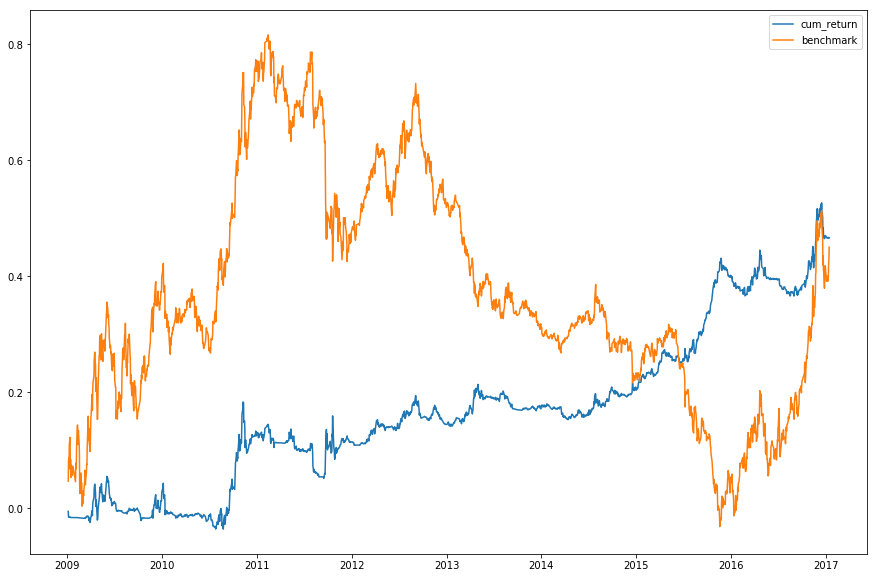

In [55]:
plt.figure(figsize=(15,10))
plt.plot(mixed_port['update_date'],mixed_port['cum_return'])
plt.plot(mixed_port['update_date'],mixed_port['benchmark'],label='benchmark')
plt.legend()

In [56]:
mixed_port['year']=mixed_port['update_date'].apply(lambda x: x.year)
each_year_return=mixed_port.groupby(['year']).portfolio_return.sum()

In [57]:
each_year_return

year
2009    0.027201
2010    0.103463
2011   -0.015975
2012    0.029745
2013    0.031230
2014    0.027795
2015    0.198155
2016    0.068290
2017   -0.003709
Name: portfolio_return, dtype: float64

In [58]:
for i,j in mixed_port.groupby(['year']):
    sharpe=(np.mean(j['portfolio_return'])*252)/(np.std(mixed_port['portfolio_return'])*np.sqrt(252))
    print i, sharpe

2009 0.326508975358
2010 1.2521928809
2011 -0.191754939831
2012 0.358512343874
2013 0.384326872306
2014 0.332274394777
2015 2.37857921916
2016 0.819728575239
2017 -1.20708023647


夏普

In [59]:
(np.mean(mixed_port['portfolio_return'])*252)/(np.std(mixed_port['portfolio_return'])*np.sqrt(252))

0.69914468174124467

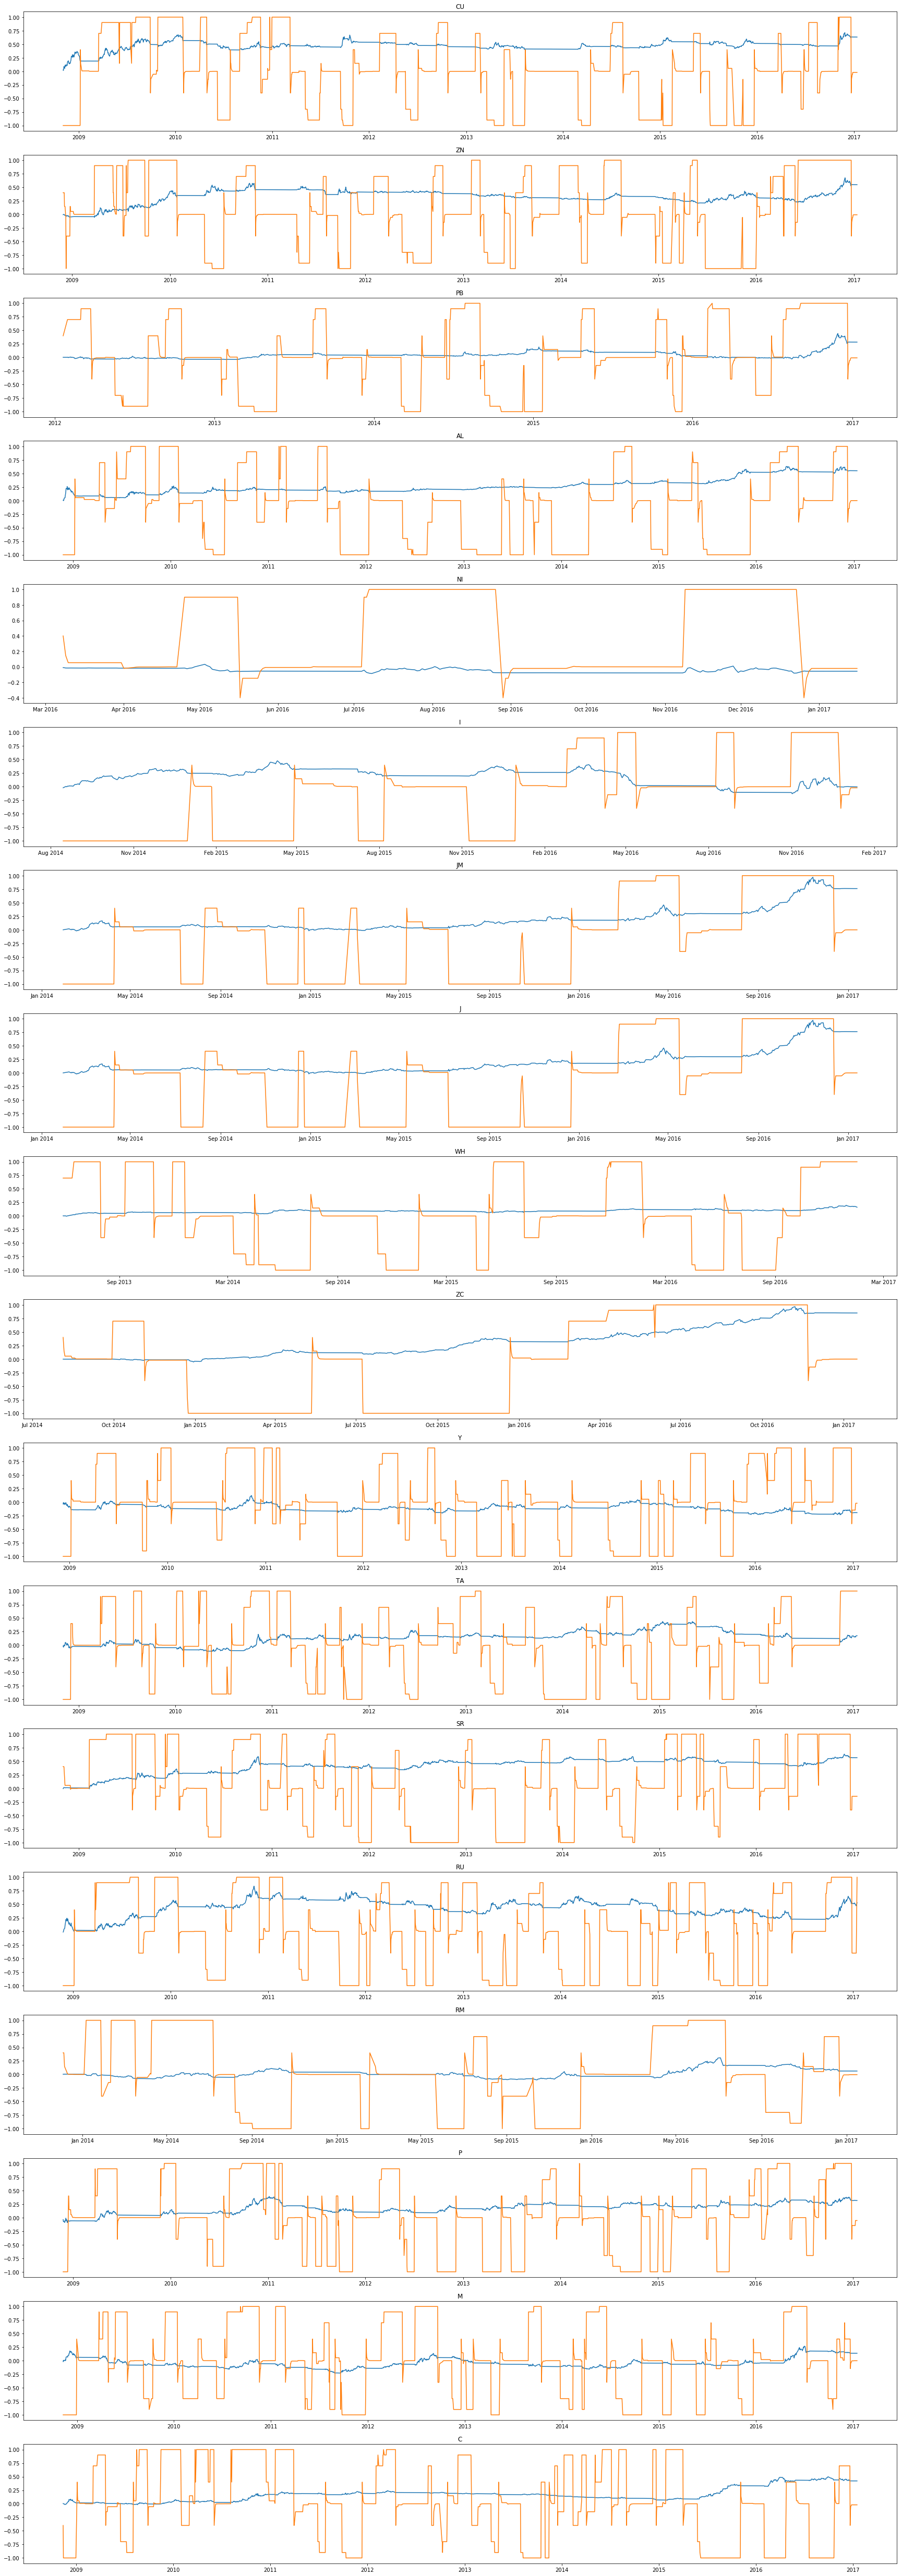

In [60]:
plt.figure(figsize=(30,90))
N=len(asset_pool)
i=1
for a in asset_pool:
    plt.subplot(N,1,i)
    tmp=execute(a)
    plt.plot(tmp['cum_return'])
    plt.plot(tmp['position']);
    plt.title(a)
    i+=1